In [1]:
#TODO
# 1) Separate calculations by chromosme (DONE!!)
# 2) Take out data so only mclow, mchigh are included

In [2]:
#Here we define the folder path that contains the csv files to be parsed
file_path = '/Users/MacProMatt/Desktop/Langlois_Project_005_copy/pile/csv'

In [3]:
import pandas as pd
import os
import csv
from sklearn.preprocessing import RobustScaler
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [4]:
#Parse csv files

pos_dict, cov_dict = {}, {}
create_index, index = True, []
for i in os.listdir(file_path):
    if i.endswith('.csv'):
        position = 1
        with open(os.path.join(file_path, i)) as in_file:
            read_file = csv.reader(in_file, delimiter=',', quotechar='|')
            last_chr = ''
            for line in read_file:
                if line[0] in ['M1', 'NA', 'NP', 'NS1', 'PA', 'PB1', 'PB2', 'NEP', 'M2']:
                    chr = line[0]
                    if not last_chr == chr:
                        position = 1
                    last_chr = chr
                    tup = (line[0], position)
                    if tup not in pos_dict:
                        pos_dict[tup] = int(line[4])
                        cov_dict[tup] = int(line[3])
                    if create_index:
                        index.append(tup)
                    else:
                        pos_dict[tup] += int(line[4])
                        cov_dict[tup] += int(line[3])
                position += 1
        create_index = False
        index = pd.MultiIndex.from_tuples(index, names = ['chromosome', 'index'])

In [5]:
#This cell is for filtering out places in the IAV genome where it seems that the flu 
#sequence varies from the reference.
#Set the factor variable to decide how strict of a cutoff this should be.

factor = (5)

for key in pos_dict:
    if pos_dict[key] > cov_dict[key]/(factor):
        pos_dict[key] = 0
        print("changed")
        print(key)

changed
('PB1', 525)


In [6]:
#create our pandas dataframe
s = pd.Series(pos_dict, name = 'position', index = index)
frame = s.to_frame(name='mutations')
s = pd.Series(cov_dict, name = 'coverage', index = index)
frame['coverage'] = s

In [7]:
#subset dataframe by IAV chromosome

frame.sort_index(level = 0)
frame.index.names = ('chromosome', 'Positon by BP')

m1 = frame.loc["M1"].copy()
m1.name = 'm1'
na = frame.loc["NA"].copy()
na.name = 'na'
np = frame.loc["NP"].copy()
np.name = 'np'
ns1 = frame.loc["NS1"].copy()
ns1.name = 'ns1'
pa = frame.loc["PA"].copy()
pa.name = 'pa'
pb1 = frame.loc["PB1"].copy()
pb1.name = 'pb1'
pb2 = frame.loc["PB2"].copy()
pb2.name = 'pb2'
nep = frame.loc["NEP"].copy()
nep.name = 'nep'
m2 = frame.loc["M2"].copy()
m2.name = 'm2'

df_list = [m1, na, np, ns1, pa, pb1, pb2, nep, m2]

In [8]:
#Normalize the values between 0 and 1 (scale the features to a range)(with account for outliers)

for i in df_list:
    #Data smoothing
    i['norm_cov'] = i['coverage'].rolling(50, min_periods=1, center = True).mean()
    i['norm_mut'] = i['mutations'].rolling(50, min_periods=1, center = True).mean()

    coverage = i['norm_cov'].as_matrix().reshape(-1, 1)
    mutations = i['norm_mut'].as_matrix().reshape(-1, 1)

    transformer_cov = RobustScaler().fit(coverage)
    transformer_mut = RobustScaler().fit(mutations)

    coverage_norm = transformer_cov.transform(coverage)
    mutations_norm = transformer_mut.transform(mutations)

    i['Per Base Coverage'] = coverage_norm
    i['Per Base Mutation Rate'] = mutations_norm
    
    if i.name is 'm1':
        m1_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'na':
        na_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'np':
        np_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'ns1':
        ns1_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'pa':
        pa_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'pb1':
        pb1_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'pb2':
        pb2_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'nep':
        nep_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    elif i.name is 'm2':
        m2_norm = i[['Per Base Mutation Rate', 'Per Base Coverage']].copy()
    else:
        print("ERROR: Wrong chromosome names")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


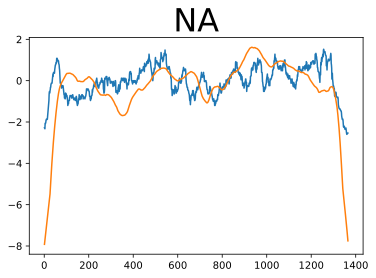

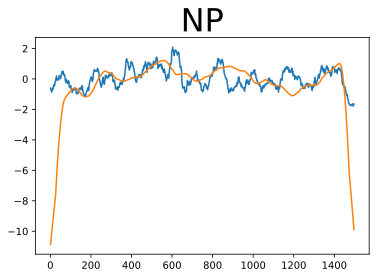

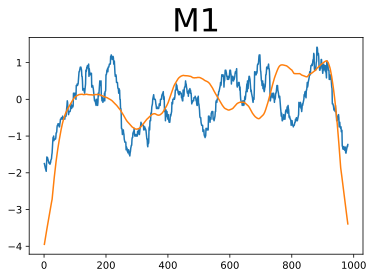

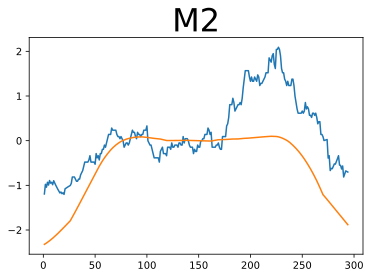

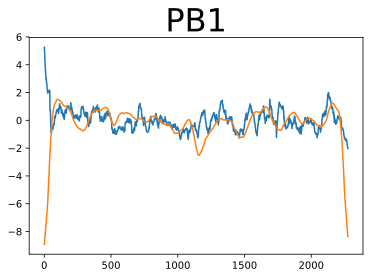

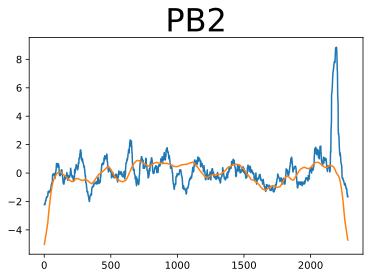

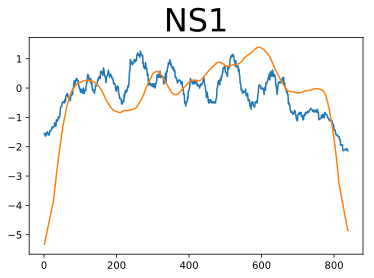

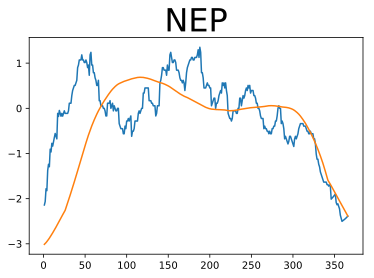

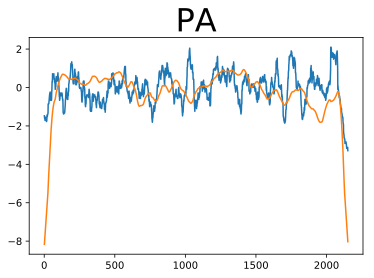

In [14]:
my_plot_na = na_norm.plot.line(title = 'NA', legend = False)
my_plot_na.set_xlabel("")
my_plot_na.title.set_size(32)
#ax.view_init(elev=elevation_angle, azim=azimuthal_angle)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/NA.png', format='png', dpi=1200)

my_plot_np = np_norm.plot.line(title = 'NP', legend = False)
my_plot_np.set_xlabel("")
my_plot_np.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/NP.png', format='png', dpi=1200)

my_plot_m1 = m1_norm.plot.line(title = 'M1', legend = False)
my_plot_m1.set_xlabel("")
my_plot_m1.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/M1.png', format='png', dpi=1200)

my_plot_m2 = m2_norm.plot.line(title = 'M2', legend = False)
my_plot_m2.set_xlabel("")
my_plot_m2.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/M2.png', format='png', dpi=1200)

my_plot_pb1 = pb1_norm.plot.line(title = 'PB1', legend = False)
my_plot_pb1.set_xlabel("")
my_plot_pb1.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/PB1.png', format='png', dpi=1200)

my_plot_pb2 = pb2_norm.plot.line(title = 'PB2', legend = False)
my_plot_pb2.set_xlabel("")
my_plot_pb2.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/PB2.png', format='png', dpi=1200)

my_plot_ns1 = ns1_norm.plot.line(title = 'NS1', legend = False)
my_plot_ns1.set_xlabel("")
my_plot_ns1.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/NS1.png', format='png', dpi=1200)

my_plot_nep = nep_norm.plot.line(title = 'NEP', legend = False)
my_plot_nep.set_xlabel("")
my_plot_nep.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/NEP.png', format='png', dpi=1200)

my_plot_pa = pa_norm.plot.line(title = 'PA', legend = False)
my_plot_pa.set_xlabel("")
my_plot_pa.title.set_size(32)
plt.savefig('/Users/MacProMatt/Desktop/chr figure/PA.png', format='png', dpi=1200)